In [1]:
import numpy as np
import matplotlib.pyplot as plt
from univariate import *

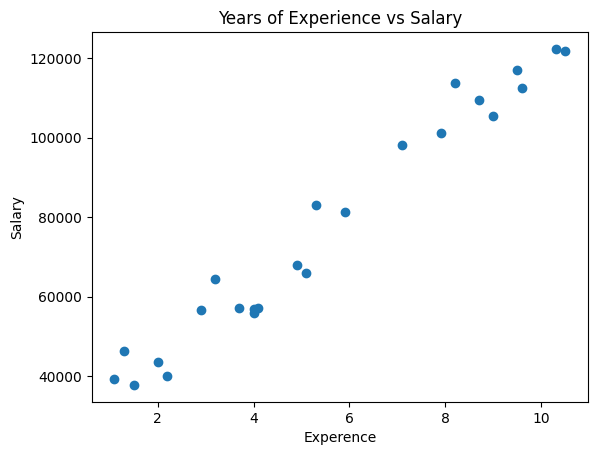

In [2]:
train_x,train_y,test_x,test_y = load_data(training_data=0.8)

plt.scatter(train_x,train_y)
plt.xlabel("Experence")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()


In [3]:
train_x_norm = z_score_normalized_features(train_x)
test_x_norm = z_score_normalized_features(test_x)
# y_norm = z_score_normalized_features(y)

initial_w = 0.
initial_b = 0.

w,b,w_history,cost_history = calculate_gradient_descent(train_x_norm,train_y,initial_w,initial_b,alpha=0.01,iterations=300)
print(f"Calculated w : {w} , b : {b}")

train_predictions = predict(train_x_norm,w,b)
test_predictions = predict(test_x_norm,w,b)
# denormalized_predicted_y = z_score_denormalized_features(y,predicted_y)



Iterations : 0 Cost : 3.34e+09
Iterations : 30 Cost : 1.83e+09
Iterations : 60 Cost : 1.01e+09
Iterations : 90 Cost : 5.59e+08
Iterations : 120 Cost : 3.13e+08
Iterations : 150 Cost : 1.78e+08
Iterations : 180 Cost : 1.04e+08
Iterations : 210 Cost : 6.36e+07
Iterations : 240 Cost : 4.15e+07
Iterations : 270 Cost : 2.94e+07
Iterations : 300 Cost : 2.29e+07
Calculated w : 27019.40117631564 , b : 73520.55039756071


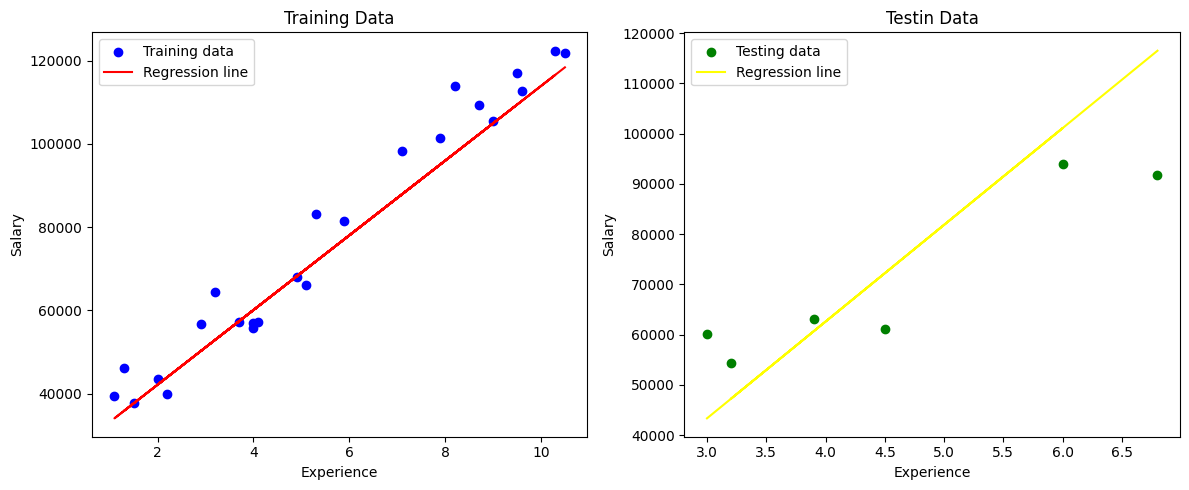

In [11]:
plt.figure(figsize=(12, 5))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(train_x, train_y, color='blue', label='Training data')
plt.plot(train_x, train_predictions, color='red', label='Regression line')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Training Data")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(test_x, test_y, color='green', label='Testing data')
plt.plot(test_x, test_predictions, color='yellow', label='Regression line')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Testin Data")

plt.tight_layout()
plt.show()

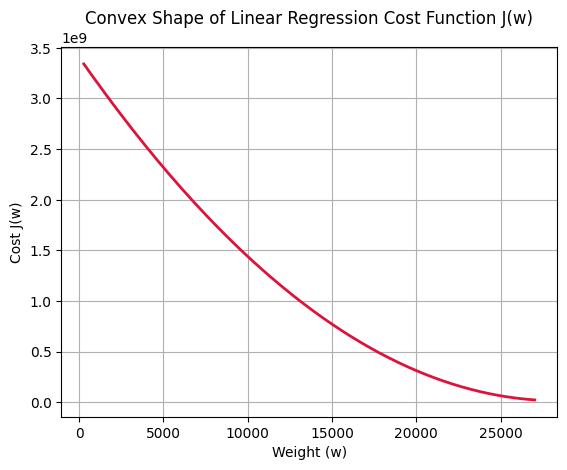

In [5]:
# plt.figure(figsize=(8,5))
plt.plot(w_history, cost_history, color='crimson', linewidth=2)
plt.title("Convex Shape of Linear Regression Cost Function J(w)")
plt.xlabel("Weight (w)")
plt.ylabel("Cost J(w)")
plt.grid(True)
plt.show()

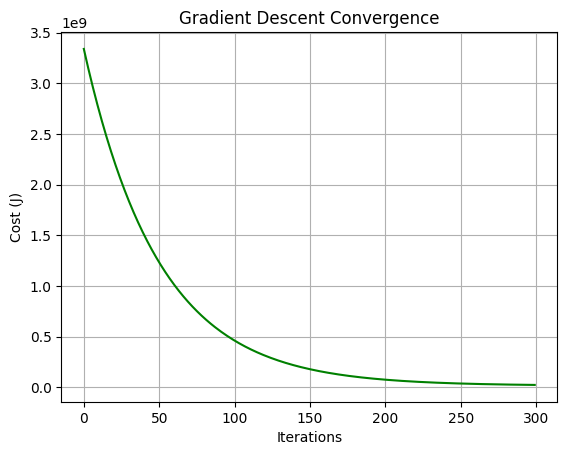

In [6]:
plt.plot(range(len(cost_history)), cost_history, color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


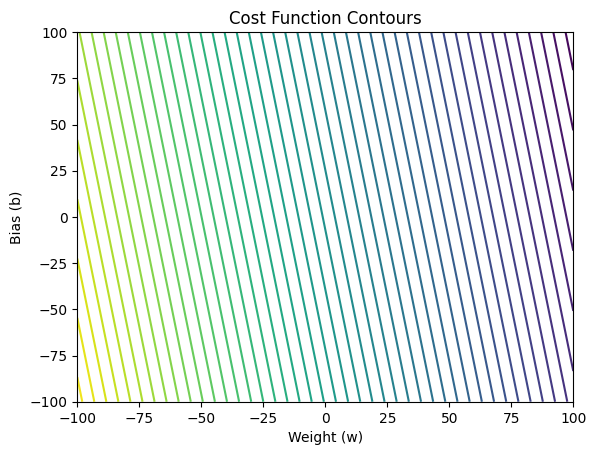

In [7]:
w_values = np.linspace(-100, 100, 100)
b_values = np.linspace(-100, 100, 100)
J_vals = np.zeros((len(w_values), len(b_values)))

for i in range(len(w_values)):
    for j in range(len(b_values)):
        J_vals[i, j] = calculate_cost(train_x, train_y, w_values[i], b_values[j])

W, B = np.meshgrid(w_values, b_values)
plt.contour(W, B, J_vals.T, levels=50, cmap='viridis')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contours')
plt.show()



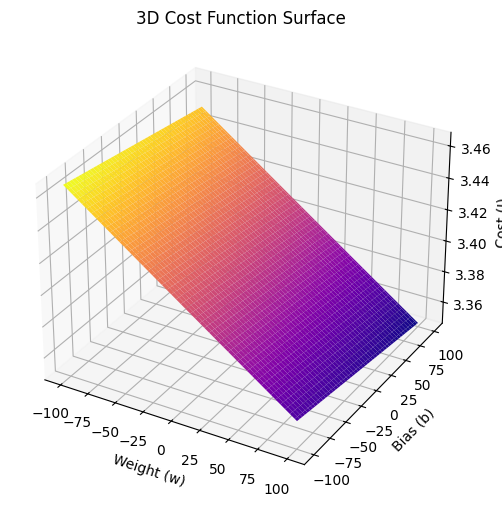

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals.T, cmap='plasma')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost (J)')
ax.set_title('3D Cost Function Surface')
plt.show()


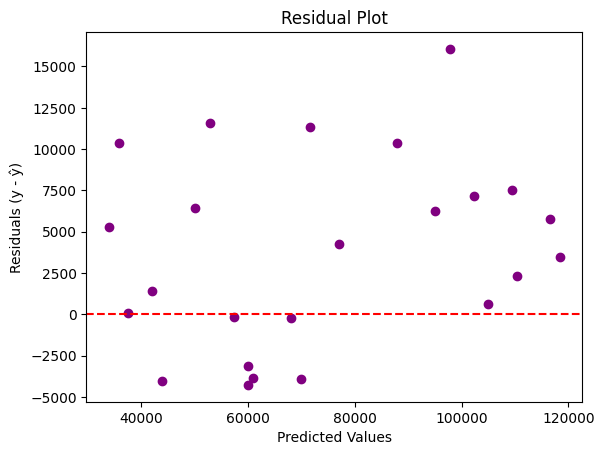

In [9]:
residuals = train_y - train_predictions
plt.scatter(train_predictions, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot")
plt.show()


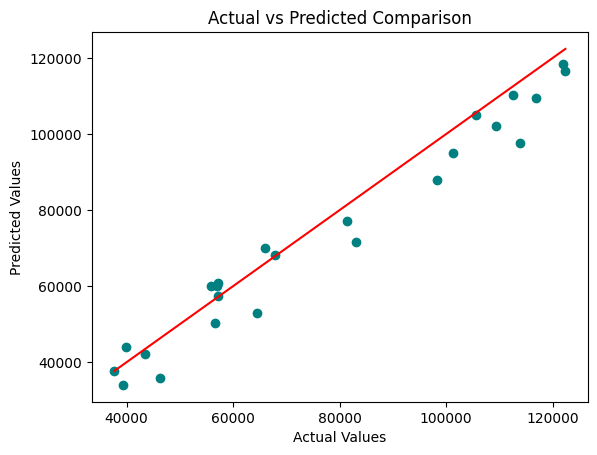

In [10]:
# y_pred = predict(x_norm, w, b)
plt.scatter(train_y, train_predictions, color='teal')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')  # perfect line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Comparison")
plt.show()

